## What I Do

1. 基于特征值分解实现了PCA
2. 基于奇异值分解实现了PCA
3. 值得注意的是，使用特征值分解实现PCA只能处理实数矩阵，而奇异值分解可以处理实数矩阵和复数矩阵

## 实验介绍

### 1. 实验内容

* 通过对给定数据进行主成分分析来了解PCA算法

### 2. 实验目标

* 通过本实验掌握PCA算法

### 3. 实验知识点

* PCA算法原理
* PCA算法流程
* PCA算法应用

### 4. 实验环境

* python 3.6.5
* sklearn 0.19.1
* matplotlib 2.2.3

## 实验准备

 点击屏幕右上方的下载实验数据模块，选择下载PCAData.txt到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集

## 数据介绍

本数据是随机生成的1000个二维样本点

## [PCA] 实验流程

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

## 1. 数据的读取与处理

In [2]:
def loadDataSet(fileName, delim = '\t'):
    """
    函数说明：加载数据集
    parameters:
       fileName -数据集名称
       delim -分隔符
    return:
       mat(datArr) -数据矩阵
    """
    
    df = pd.read_csv(fileName, sep=delim, header=None)
    
    return mat(array(df))

## 2. PCA主要原理的实现

### 2.1. 基于特征值分解

$$
A=W\Sigma W^T
$$
其中，$W$ 表示特征向量矩阵，$\Sigma$ 表示特征值矩阵。选取前$k$ 个特征值对应的特征向量作为主成分。

In [3]:
def pca_evd(dataMat, topNfeat = 9999999):
    """
    函数说明：PCA算法实现，基于特征值分解
    parameters:
        dataMat -用于进行PCA操作的数据集
        topNfeat -应用的N个特征
    return:
        lowDataMat -将维后的数据集
        reconMat -重构的数据集
    """
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigVals, eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:, eigValInd]
    lowDataMat = meanRemoved * redEigVects
    reconMat = (lowDataMat * redEigVects.T) + meanVals
    return lowDataMat, reconMat

### 2.2. 基于奇异值分解

$$
A=U\Sigma V^T
$$
其中，$U$ 和$V$ 表示左右奇异矩阵，$\Sigma$ 表示奇异值矩阵。选取前$k$ 个奇异值对应的向量作为主成分。

> 值得注意的是，使用特征值分解实现PCA只能处理实数矩阵，而SVD可以处理实数矩阵和复数矩阵

In [4]:
def pca_svd(dataMat, topNfeat = 9999999):
    """
    函数说明：PCA算法实现，基于奇异值分解
    parameters:
        dataMat -用于进行PCA操作的数据集
        topNfeat -应用的N个特征
    return:
        lowDataMat -将维后的数据集
        reconMat -重构的数据集
    """
    data_mean = mean(dataMat, axis=0)
    data_centered = dataMat - data_mean
    U, S, V = linalg.svd(data_centered)
    eigenvectors = V[:topNfeat]
    lowDataMat = dot(data_centered, eigenvectors.T)
    reconMat = (lowDataMat * eigenvectors) + data_mean
    return lowDataMat, reconMat

## 3. 实验结果的可视化

In [5]:
def drawDataSet(dataMat, reconMat):
    """
    函数说明：绘制数据集
    parameters:
        dataMat -原始数据集
        reconMat -重构数据集
    return:
        A picture
    """   
    fig = plt.figure(figsize=[10, 8])
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
    ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=90, c='red')
    return ax

## 6. 主函数调用其他函数

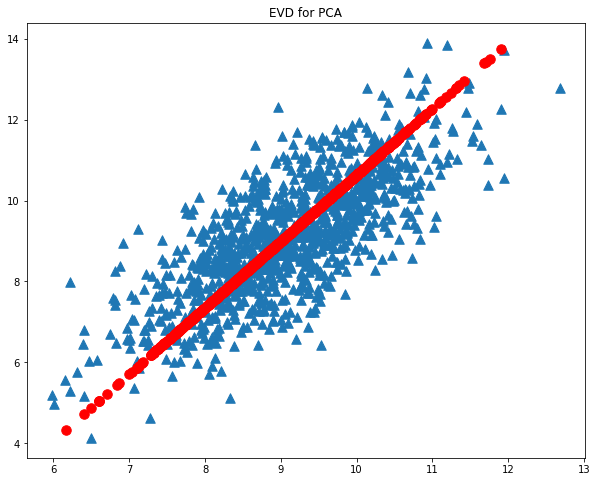

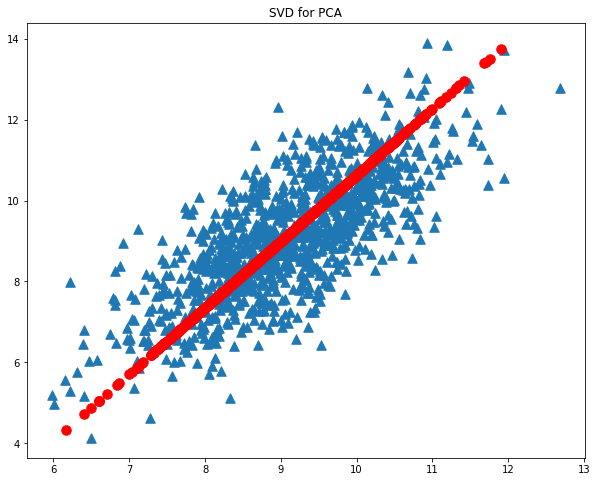

In [6]:
if __name__ =='__main__':
    
    """
    按照PCA原理来调用上述函数
    """
    dataMat = loadDataSet('./work/PCAData.txt')
    lowDMat, reconMat = pca_evd(dataMat, 1)
    ax1 = drawDataSet(dataMat, reconMat)
    ax1.set_title('EVD for PCA')
    lowDMat, reconMat = pca_svd(dataMat, 1)
    ax2 = drawDataSet(dataMat, reconMat)
    ax2.set_title('SVD for PCA')